<a href="https://colab.research.google.com/github/vanitaPalanki/AI_ML_Internship_Work/blob/main/classifier_problem_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2 class classification.
Class_1:Audio signals of Female_speech_and_woman_speaking,
Class_2: Audio signals of Electric_guitar.
classifiers: SVM(Kernel = ('Linear & rbf')), KNN, Decision tree.

In [ ]:
import pandas as pd
import numpy as np
import librosa
from scipy.fft import rfft, rfftfreq
import scipy.signal
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.metrics import specificity_score, sensitivity_score
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv('/content/files/train_curated_post_competition.csv')

df = df.drop(['freesound_id', 'license'], axis=1)


data_classes = {}

obj = df.groupby(['labels'])

for i, data in obj:
  data_classes[i] = data

data = np.array(df.loc[df['labels']== 'Female_speech_and_woman_speaking']) #44 samples
data2 = np.array(df.loc[df['labels'] == 'Electric_guitar']) # 52 samples

dt = np.concatenate((data, data2))

#print(dt[:, 0])

<ipython-input-1-ebed537a45c9>:25: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, data in obj:


In [ ]:
fm = pd.DataFrame(columns = ['Signal', 'FFT Band1 Mean', 'FFT Band1 STD', 'FFT Band2 Mean', 'FFT Band2 STD','FFT Band3 Mean', 'FFT Band3 STD','FFT Band4 Mean', 'FFT Band4 STD','FFT Band5 Mean', 'FFT Band5 STD','PSD Band1 Mean', 'PSD Band1 STD', 'PSD Band2 Mean', 'PSD Band2 STD', 'PSD Band3 Mean', 'PSD Band3 STD', 'PSD Band4 Mean', 'PSD Band4 STD', 'PSD Band5 Mean', 'PSD Band5 STD'])

for i in (dt):

  path = '/content/audio_files/' + i[0]

  data = librosa.load(path, mono = True)

  N = len(data[0])

  yf = rfft(data[0])
  xf = rfftfreq(N, 1/data[1])

  band1 = [i for i in range(len(xf)) if xf[i]>= 0 and xf[i] <= 2000]

  b1_mean_0_2k = float(np.mean(yf[band1]))
  b1_std_0_2k = np.std(yf[band1])

  band2 = [i for i in range(len(xf)) if xf[i] >2000 and xf[i] <= 4000 ]

  b2_mean_2k_4k = float(np.mean(yf[band2]))
  b2_std_2k_4k = np.std(yf[band2])

  band3 = [i for i in range(len(xf)) if xf[i] > 4000 and xf[i]<=6000 ]

  b3_mean_4k_6k = float(np.mean(yf[band3]))
  b3_std_4k_6k = np.std(yf[band3])

  band4 = [i for i in range(len(xf)) if xf[i]> 6000 and xf[i]<= 8000]

  b4_mean_6k_8k = float(np.mean(yf[band4]))
  b4_std_6k_8k = np.std(yf[band4])

  band5 = [i for i in range(len(xf)) if xf[i] > 8000 and xf[i] <= 11000]

  b5_mean_8k_11k = float(np.mean(yf[band5]))
  b5_std_8k_11k = np.std(yf[band5])

  f,s = scipy.signal.welch(data[0], fs = 10000, nperseg = 2*1024 )

  band1 = [i for i in range(len(f)) if f[i]>=0 and f[i]<=1000]

  psd_b1_mean_0_1000 = float(np.mean(s[band1]))
  psd_b1_std_0_1000 = np.std(s[band1])

  band2 = [i for i in range(len(f)) if f[i]>1000 and f[i]<= 2000]

  psd_b2_mean_1k_2k = float(np.mean(s[band2]))
  psd_b2_std_1k_2K = np.std(s[band2])

  band3 = [i for i in range(len(f)) if f[i]>2000 and f[i]<=3000]

  psd_b3_mean_2k_3K = float(np.mean(s[band3]))
  psd_b3_std_2k_3k = np.std(s[band3])

  band4 = [i for i in range(len(f)) if f[i]>3000 and f[i] <= 4000]

  psd_b4_mean_3k_4k = float(np.mean(s[band4]))
  psd_b4_std_3k_4k = np.std(s[band4])

  band5 = [i for i in range(len(f)) if f[i]> 4000 and f[i]<= 5000]

  psd_b5_mean_4k_5k = float(np.mean(s[band5]))
  psd_b5_std_4k_5k = np.std(s[band5])

  fm.loc[len(fm)] = [i[1], b1_mean_0_2k, b1_std_0_2k, b2_mean_2k_4k, b2_std_2k_4k, b3_mean_4k_6k, b3_std_4k_6k, b4_mean_6k_8k, b4_std_6k_8k, b5_mean_8k_11k, b5_std_8k_11k, psd_b1_mean_0_1000, psd_b1_std_0_1000, psd_b2_mean_1k_2k, psd_b2_std_1k_2K, psd_b3_mean_2k_3K, psd_b3_std_2k_3k, psd_b4_mean_3k_4k, psd_b4_std_3k_4k, psd_b5_mean_4k_5k, psd_b5_std_4k_5k]

label = []

for i in (dt):
  if i[1] == 'Female_speech_and_woman_speaking':
    lb = 1
  else:
    lb = 0
  label = np.append(label, lb)
fm.insert(21, 'label', label)

<ipython-input-2-960db71930a1>:16: ComplexWarning: Casting complex values to real discards the imaginary part
  b1_mean_0_2k = float(np.mean(yf[band1]))
<ipython-input-2-960db71930a1>:21: ComplexWarning: Casting complex values to real discards the imaginary part
  b2_mean_2k_4k = float(np.mean(yf[band2]))
<ipython-input-2-960db71930a1>:26: ComplexWarning: Casting complex values to real discards the imaginary part
  b3_mean_4k_6k = float(np.mean(yf[band3]))
<ipython-input-2-960db71930a1>:31: ComplexWarning: Casting complex values to real discards the imaginary part
  b4_mean_6k_8k = float(np.mean(yf[band4]))
<ipython-input-2-960db71930a1>:36: ComplexWarning: Casting complex values to real discards the imaginary part
  b5_mean_8k_11k = float(np.mean(yf[band5]))
<ipython-input-2-960db71930a1>:16: ComplexWarning: Casting complex values to real discards the imaginary part
  b1_mean_0_2k = float(np.mean(yf[band1]))
<ipython-input-2-960db71930a1>:21: ComplexWarning: Casting complex values to 

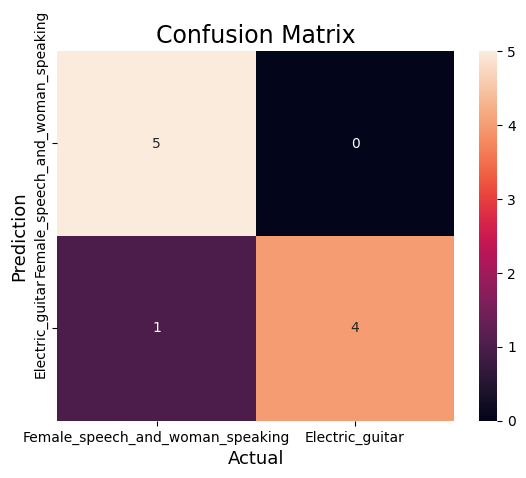

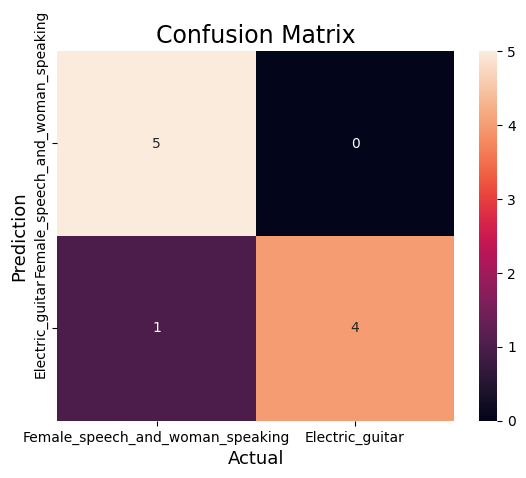

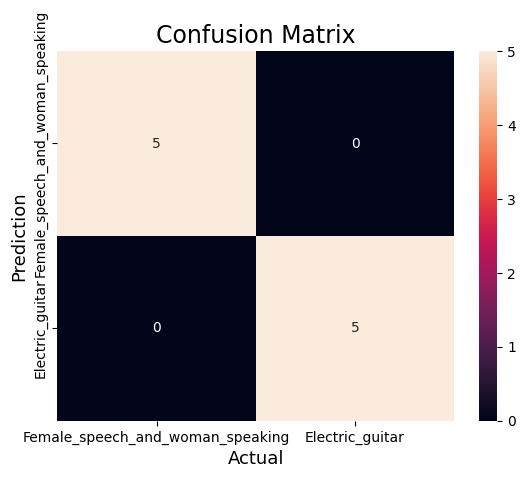

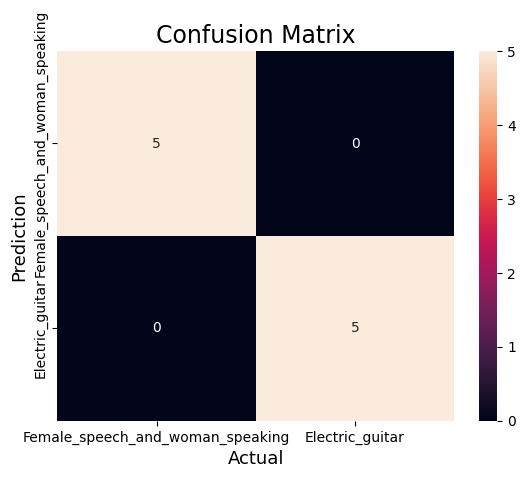

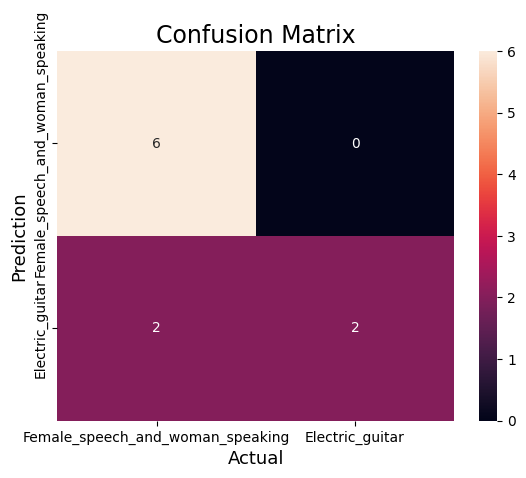

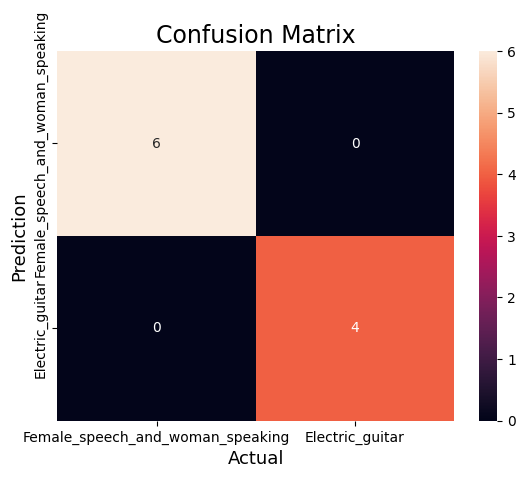

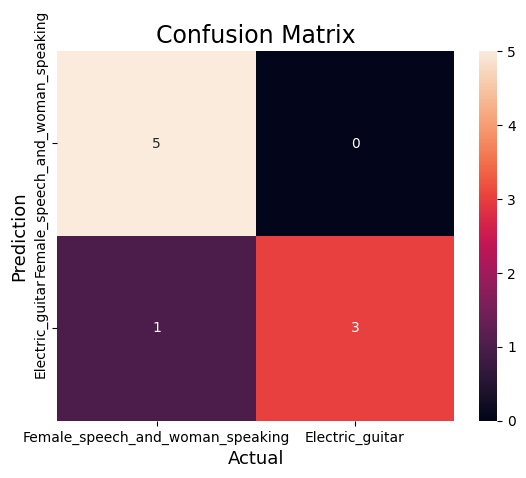

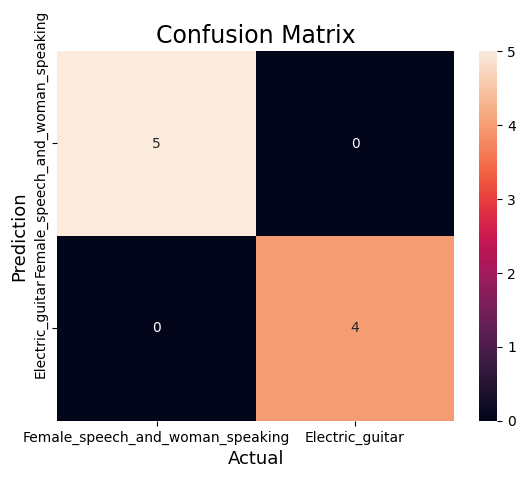

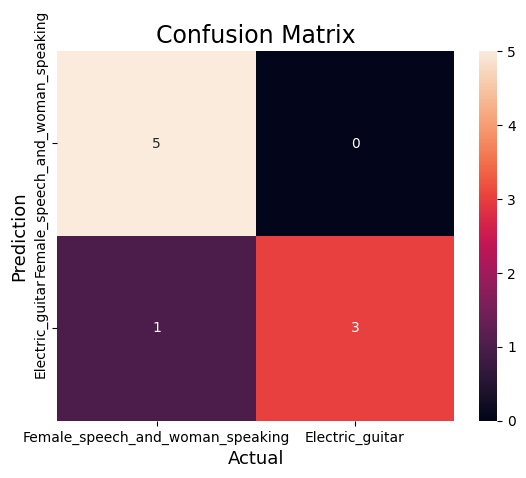

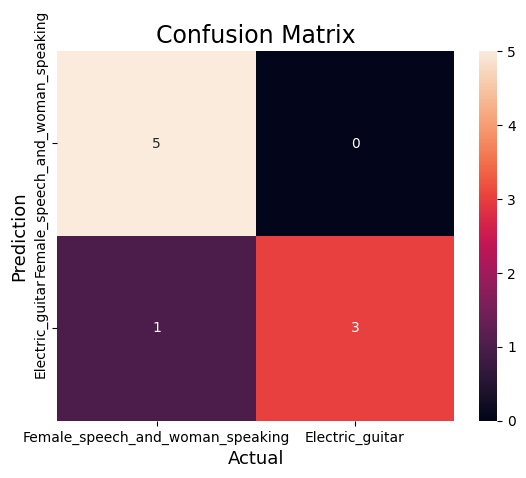

Accuracy: [0.9, 0.9, 1.0, 1.0, 0.8, 1.0, 0.8888888888888888, 1.0, 0.8888888888888888, 0.8888888888888888]
Precision: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Recall: [0.8, 0.8, 1.0, 1.0, 0.5, 1.0, 0.75, 1.0, 0.75, 0.75]
Sensitivity: [0.8, 0.8, 1.0, 1.0, 0.5, 1.0, 0.75, 1.0, 0.75, 0.75]
Specificity: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Average accuracy: 0.9266666666666667
Average precision: 1.0
Average recall: 0.835
Average sensitivity: 0.835
Average specificity: 1.0


In [ ]:
X = fm.iloc[:, 1:20].values
y = fm.iloc[:,21].values

clf = svm.SVC(kernel='linear')

skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1)

accu_list = []

recall_list = []

precision_list = []

specificity_list = []

sensitivity_list = []

for train_index, test_index in skf.split(X,y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)

  accu_list.append(metrics.accuracy_score(y_test, y_pred))
  precision_list.append(metrics.precision_score(y_test, y_pred))
  recall_list.append(metrics.recall_score(y_test, y_pred))
  specificity_list.append(specificity_score(y_test, y_pred))
  sensitivity_list.append(sensitivity_score(y_test, y_pred))

  result = confusion_matrix(y_test, y_pred)
  sns.heatmap(result,
              annot = True,
              fmt = 'g',
              xticklabels = ['Female_speech_and_woman_speaking', 'Electric_guitar'],
              yticklabels = ['Female_speech_and_woman_speaking', 'Electric_guitar']
              )
  plt.ylabel('Prediction', fontsize=13)
  plt.xlabel('Actual', fontsize=13)
  plt.title('Confusion Matrix', fontsize = 17)
  plt.show()

avg_accuracy = np.average(accu_list)
avg_precision = np.average(precision_list)
avg_recall = np.average(recall_list)
avg_sensitivity = np.average(sensitivity_list)
avg_specificity = np.average(specificity_list)

print("Accuracy:",accu_list)

print("Precision:",precision_list)

print("Recall:",recall_list)

print("Sensitivity:",sensitivity_list)

print("Specificity:",specificity_list)

print("Average accuracy:",avg_accuracy)

print("Average precision:",avg_precision)

print("Average recall:",avg_recall)

print("Average sensitivity:",avg_sensitivity)

print("Average specificity:",avg_specificity)




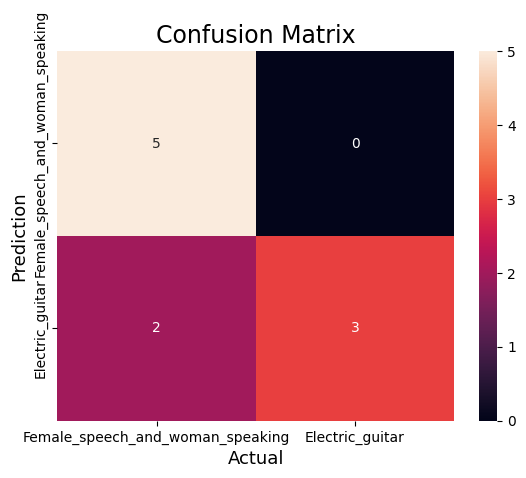

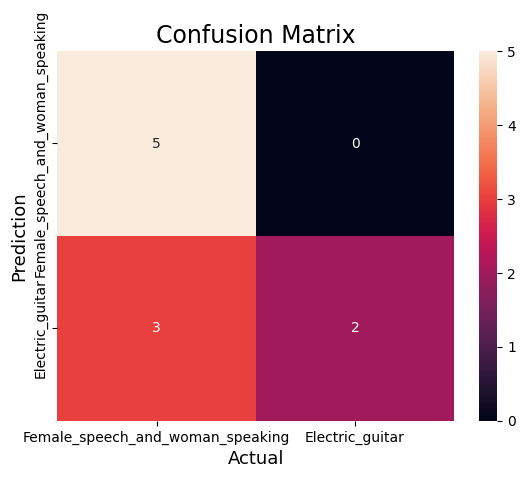

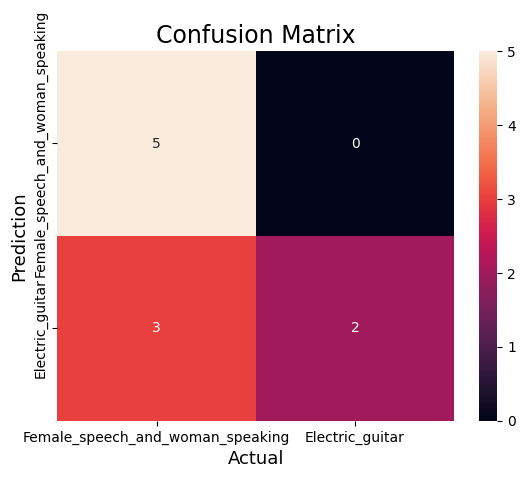

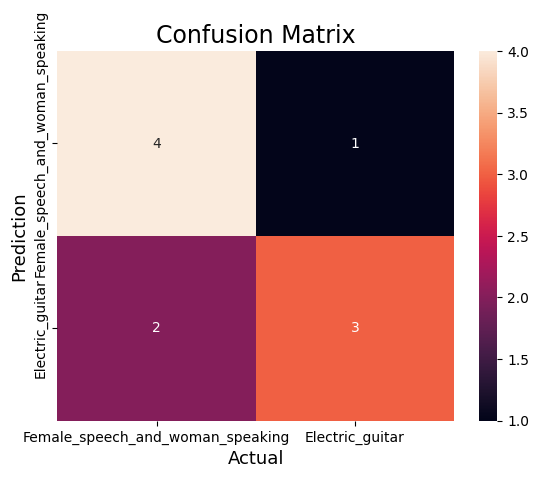

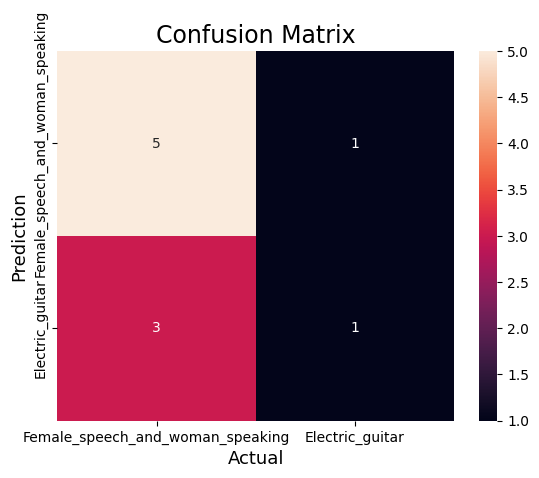

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


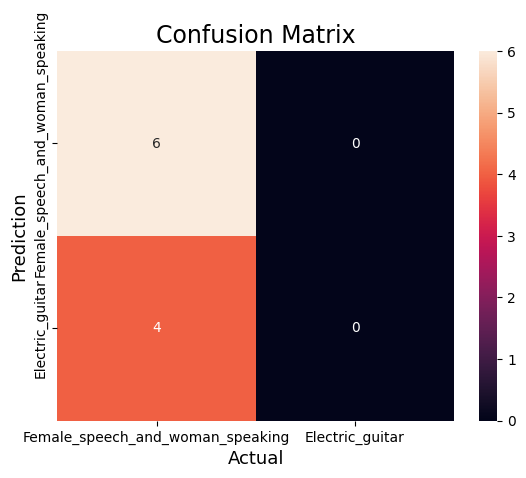

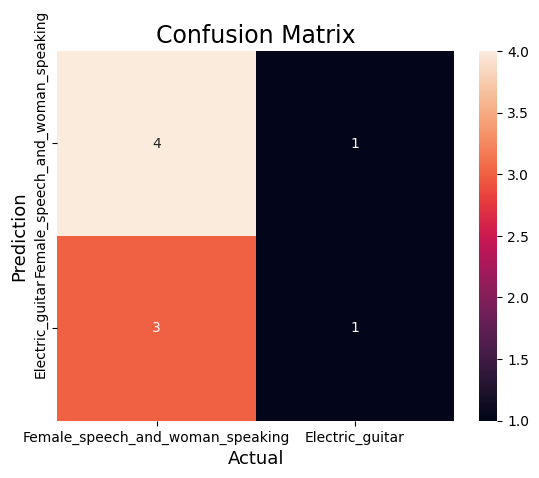

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


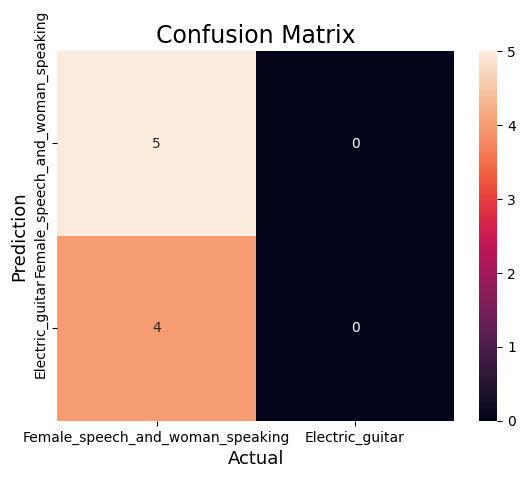

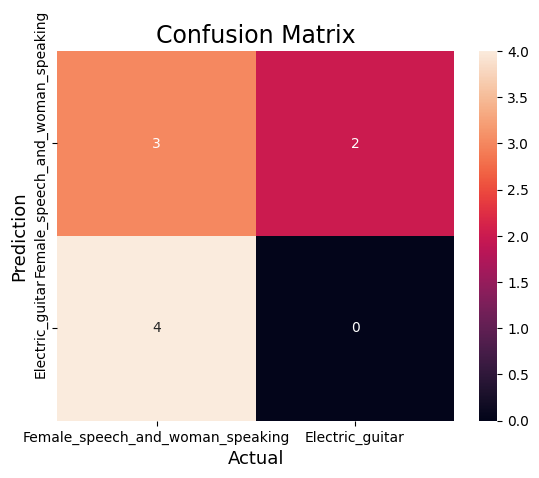

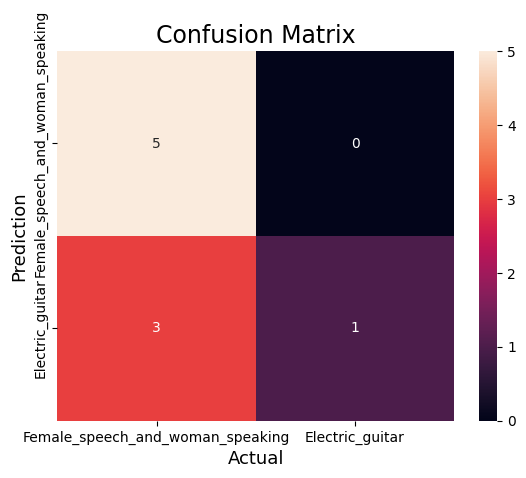

Accuracy: [0.8, 0.7, 0.7, 0.7, 0.6, 0.6, 0.5555555555555556, 0.5555555555555556, 0.3333333333333333, 0.6666666666666666]
Precision: [1.0, 1.0, 1.0, 0.75, 0.5, 0.0, 0.5, 0.0, 0.0, 1.0]
Recall: [1.0, 1.0, 1.0, 0.75, 0.5, 0.0, 0.5, 0.0, 0.0, 1.0]
Sensitivity: [0.6, 0.4, 0.4, 0.6, 0.25, 0.0, 0.25, 0.0, 0.0, 0.25]
Specificity: [1.0, 1.0, 1.0, 0.8, 0.8333333333333334, 1.0, 0.8, 1.0, 0.6, 1.0]
Average accuracy: 0.6211111111111111
Average precision: 0.575
Average recall: 0.575
Average sensitivity: 0.275
Average specificity: 0.9033333333333333


In [ ]:
clf = svm.SVC(kernel='rbf', gamma=0.1)

rbf_acc_list = []

rbf_precision_list = []

rbf_recall_list = []

rbf_specificity_list = []

rbf_sensitivity_list = []

for train_index, test_index in skf.split(X,y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)

  rbf_acc_list.append(metrics.accuracy_score(y_test, y_pred))
  rbf_precision_list.append(metrics.precision_score(y_test, y_pred))
  rbf_recall_list.append(metrics.precision_score(y_test, y_pred))
  rbf_sensitivity_list.append(sensitivity_score(y_test, y_pred))
  rbf_specificity_list.append(specificity_score(y_test, y_pred))


  result = confusion_matrix(y_test, y_pred)
  sns.heatmap(result,
              annot = True,
              fmt = 'g',
              xticklabels = ['Female_speech_and_woman_speaking', 'Electric_guitar'],
              yticklabels = ['Female_speech_and_woman_speaking', 'Electric_guitar']
              )
  plt.ylabel('Prediction', fontsize=13)
  plt.xlabel('Actual', fontsize=13)
  plt.title('Confusion Matrix', fontsize = 17)
  plt.show()

rbf_avg_accuracy = np.average(rbf_acc_list)
rbf_avg_precision = np.average(rbf_precision_list)
rbf_avg_recall = np.average(rbf_recall_list)
rbf_avg_sensitivity = np.average(rbf_sensitivity_list)
rbf_avg_specificity = np.average(rbf_specificity_list)

print("Accuracy:",rbf_acc_list)

print("Precision:",rbf_precision_list)

print("Recall:",rbf_recall_list)

print("Sensitivity:",rbf_sensitivity_list)

print("Specificity:",rbf_specificity_list)

print("Average accuracy:",rbf_avg_accuracy)

print("Average precision:",rbf_avg_precision)

print("Average recall:",rbf_avg_recall)

print("Average sensitivity:",rbf_avg_sensitivity)

print("Average specificity:",rbf_avg_specificity)

Decission tree classifier.

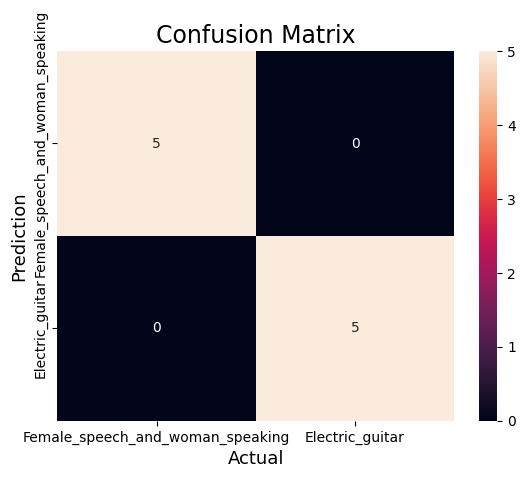

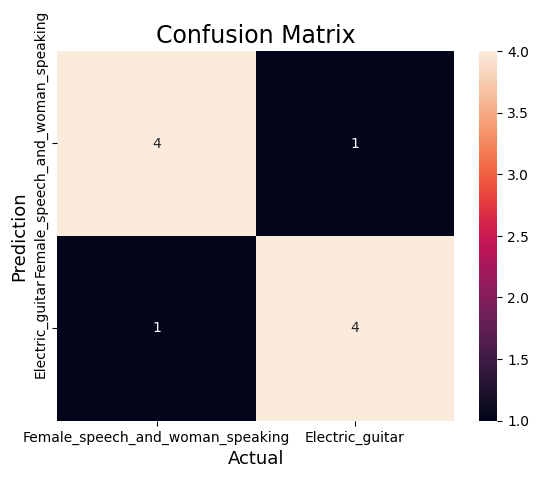

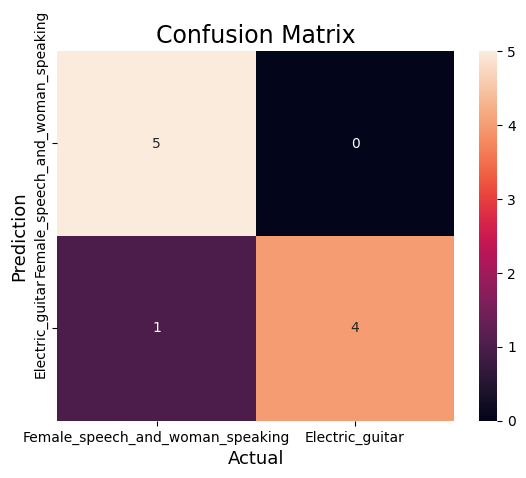

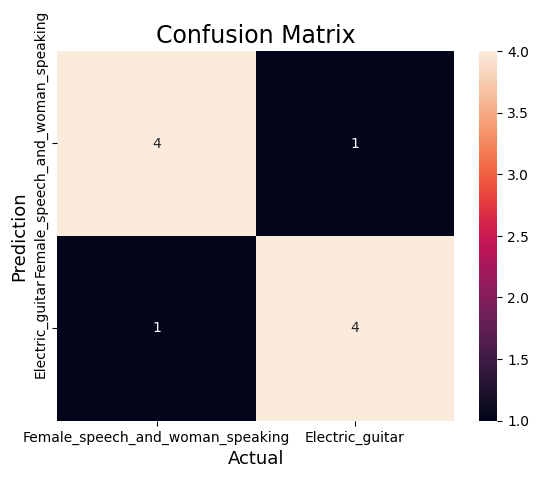

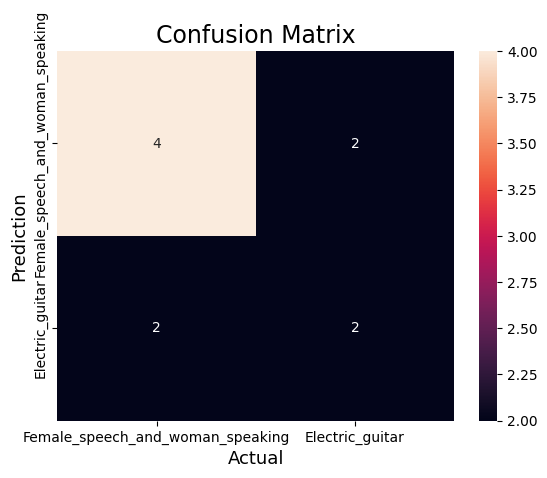

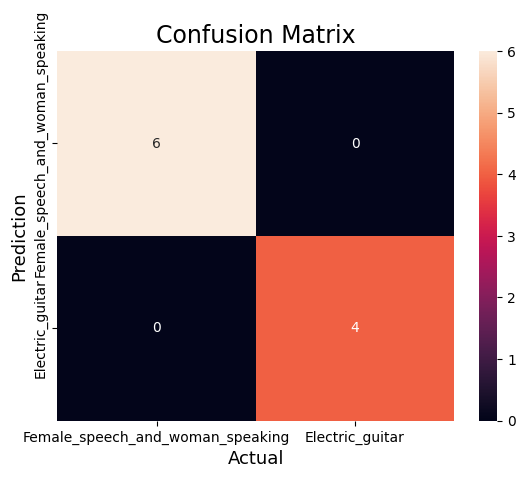

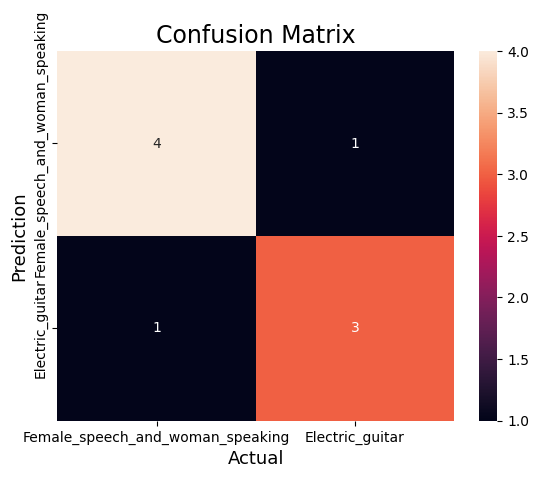

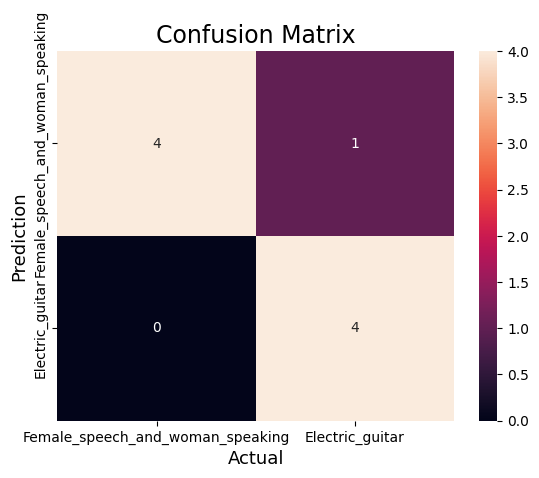

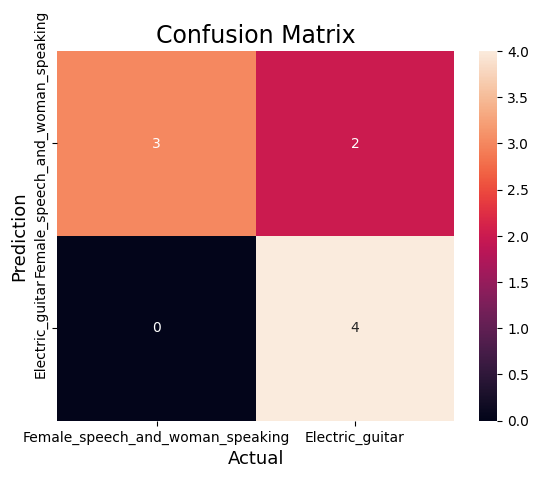

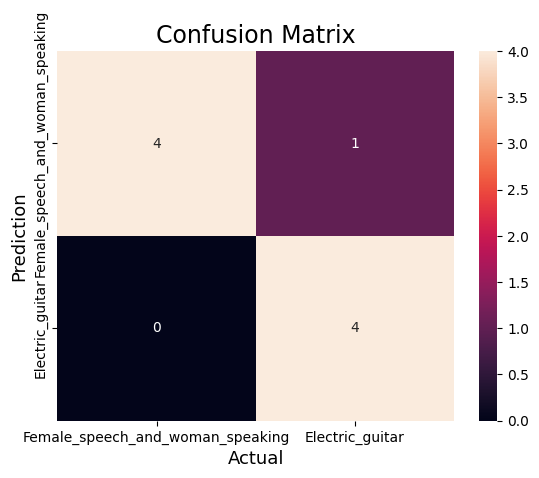

Accuracy: [1.0, 0.8, 0.9, 0.8, 0.6, 1.0, 0.7777777777777778, 0.8888888888888888, 0.7777777777777778, 0.8888888888888888]
Precision: [1.0, 0.8, 1.0, 0.8, 0.5, 1.0, 0.75, 0.8, 0.6666666666666666, 0.8]
Recall: [1.0, 0.8, 1.0, 0.8, 0.5, 1.0, 0.75, 0.8, 0.6666666666666666, 0.8]
Sensitivity: [1.0, 0.8, 0.8, 0.8, 0.5, 1.0, 0.75, 1.0, 1.0, 1.0]
Specificity: [1.0, 0.8, 1.0, 0.8, 0.6666666666666666, 1.0, 0.8, 0.8, 0.6, 0.8]
Average accuracy: 0.8433333333333334
Average precision: 0.8116666666666668
Average recall: 0.8116666666666668
Average sensitivity: 0.865
Average specificity: 0.8266666666666668


In [ ]:
clf = DecisionTreeClassifier(criterion='entropy', random_state=0)

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

acc_list = []

precision_list = []

recall_list = []

specificity_list = []

sensitivity_list = []

for train_index, test_index in skf.split(X,y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)

  acc_list.append(metrics.accuracy_score(y_test, y_pred))
  precision_list.append(metrics.precision_score(y_test, y_pred))
  recall_list.append(metrics.precision_score(y_test, y_pred))
  sensitivity_list.append(sensitivity_score(y_test, y_pred))
  specificity_list.append(specificity_score(y_test, y_pred))

  result = confusion_matrix(y_test, y_pred)
  sns.heatmap(result,
              annot = True,
              fmt = 'g',
              xticklabels = ['Female_speech_and_woman_speaking', 'Electric_guitar'],
              yticklabels = ['Female_speech_and_woman_speaking', 'Electric_guitar']
              )
  plt.ylabel('Prediction', fontsize=13)
  plt.xlabel('Actual', fontsize=13)
  plt.title('Confusion Matrix', fontsize = 17)
  plt.show()

avg_accuracy = np.average(acc_list)
avg_precision = np.average(precision_list)
avg_recall = np.average(recall_list)
avg_sensitivity = np.average(sensitivity_list)
avg_specificity = np.average(specificity_list)

print("Accuracy:",acc_list)

print("Precision:",precision_list)

print("Recall:",recall_list)

print("Sensitivity:",sensitivity_list)

print("Specificity:",specificity_list)

print("Average accuracy:",avg_accuracy)

print("Average precision:",avg_precision)

print("Average recall:",avg_recall)

print("Average sensitivity:",avg_sensitivity)

print("Average specificity:",avg_specificity)

KNN

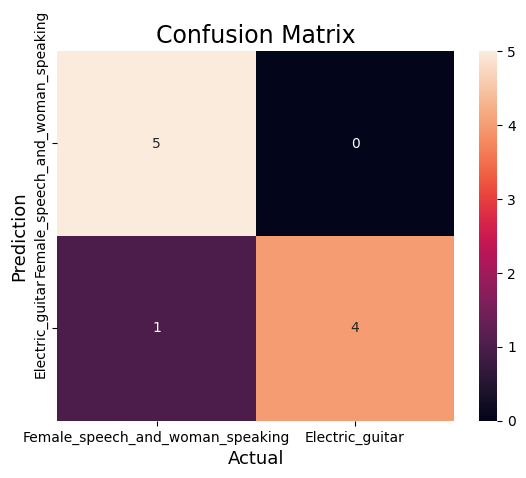

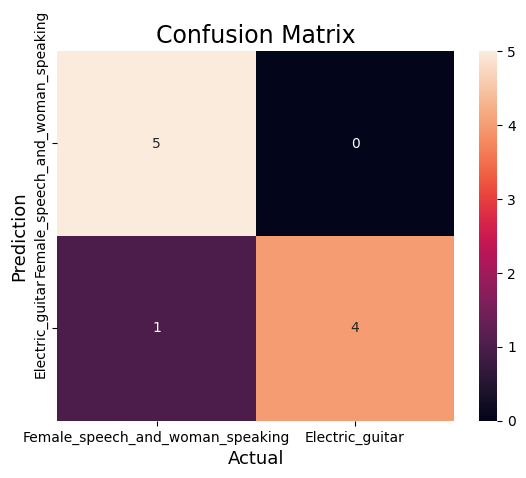

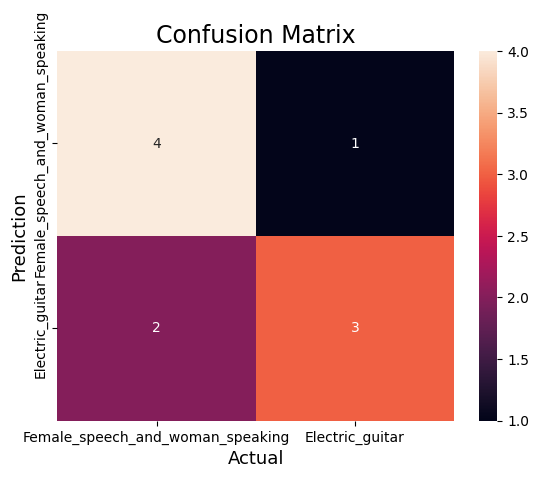

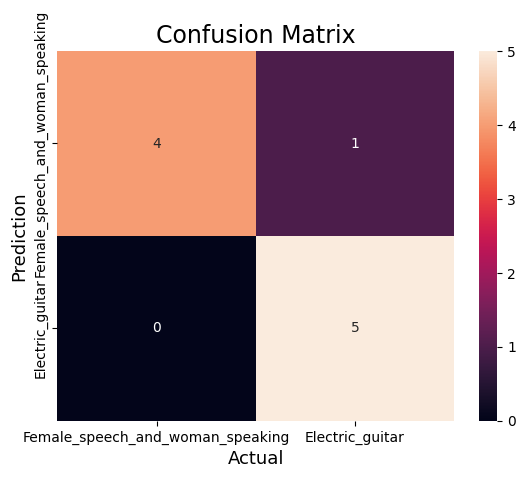

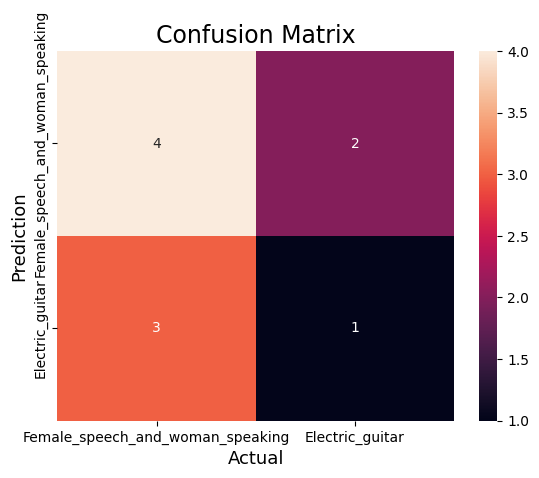

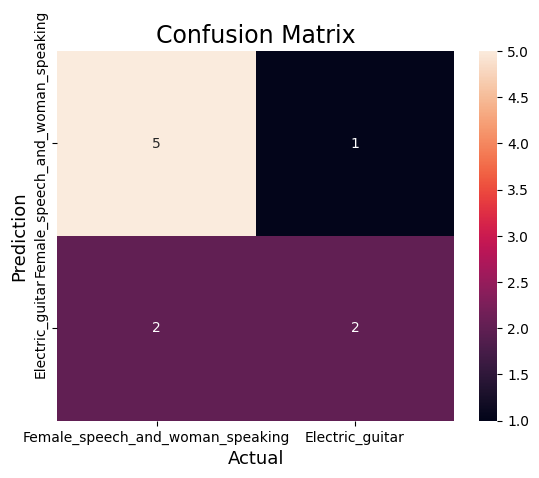

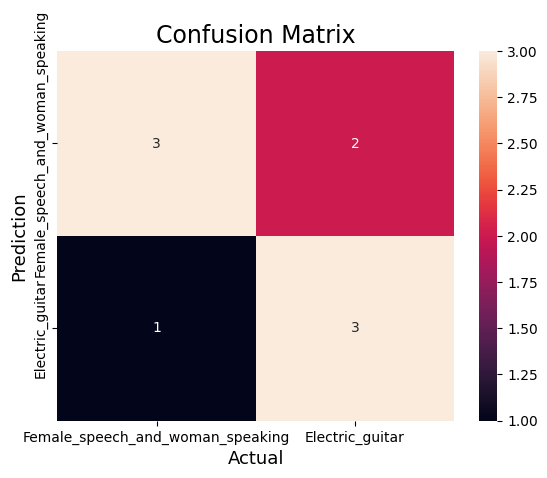

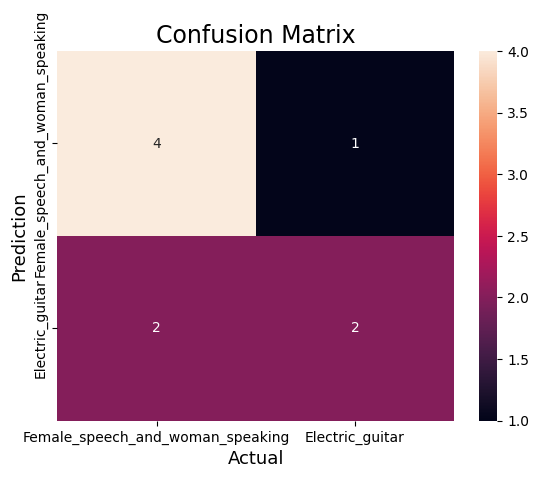

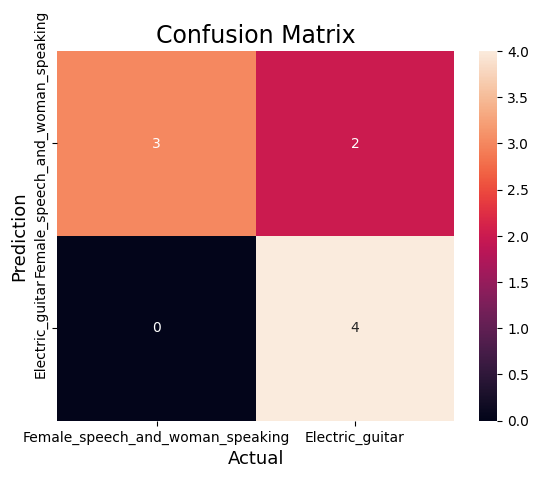

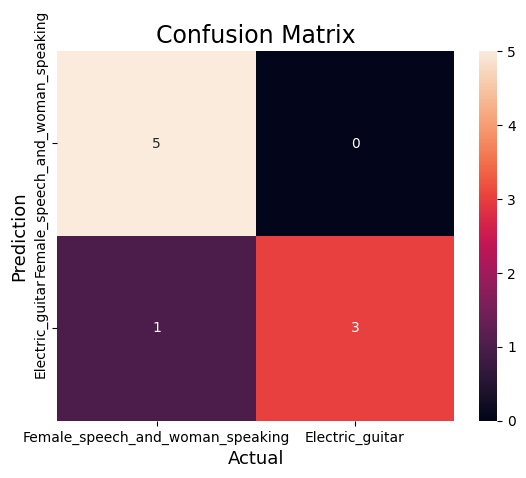

Accuracy: [0.9, 0.9, 0.7, 0.9, 0.5, 0.7, 0.6666666666666666, 0.6666666666666666, 0.7777777777777778, 0.8888888888888888]
Precision: [1.0, 1.0, 0.75, 0.8333333333333334, 0.3333333333333333, 0.6666666666666666, 0.6, 0.6666666666666666, 0.6666666666666666, 1.0]
Recall: [1.0, 1.0, 0.75, 0.8333333333333334, 0.3333333333333333, 0.6666666666666666, 0.6, 0.6666666666666666, 0.6666666666666666, 1.0]
Sensitivity: [0.8, 0.8, 0.6, 1.0, 0.25, 0.5, 0.75, 0.5, 1.0, 0.75]
Specificity: [1.0, 1.0, 0.8, 0.8, 0.6666666666666666, 0.8333333333333334, 0.6, 0.8, 0.6, 1.0]
Average accuracy: 0.76
Average precision: 0.7516666666666667
Average recall: 0.7516666666666667
Average sensitivity: 0.6950000000000001
Average specificity: 0.8099999999999999


In [ ]:
clf = KNeighborsClassifier(n_neighbors = 3)

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

acc_list = []

precision_list = []

recall_list = []

specificity_list = []

sensitivity_list = []

for train_index, test_index in skf.split(X,y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)

  acc_list.append(metrics.accuracy_score(y_test, y_pred))
  precision_list.append(metrics.precision_score(y_test, y_pred))
  recall_list.append(metrics.precision_score(y_test, y_pred))
  sensitivity_list.append(sensitivity_score(y_test, y_pred))
  specificity_list.append(specificity_score(y_test, y_pred))

  result = confusion_matrix(y_test, y_pred)
  sns.heatmap(result,
              annot = True,
              fmt = 'g',
              xticklabels = ['Female_speech_and_woman_speaking', 'Electric_guitar'],
              yticklabels = ['Female_speech_and_woman_speaking', 'Electric_guitar']
              )
  plt.ylabel('Prediction', fontsize=13)
  plt.xlabel('Actual', fontsize=13)
  plt.title('Confusion Matrix', fontsize = 17)
  plt.show()

avg_accuracy = np.average(acc_list)
avg_precision = np.average(precision_list)
avg_recall = np.average(recall_list)
avg_sensitivity = np.average(sensitivity_list)
avg_specificity = np.average(specificity_list)

print("Accuracy:",acc_list)

print("Precision:",precision_list)

print("Recall:",recall_list)

print("Sensitivity:",sensitivity_list)

print("Specificity:",specificity_list)

print("Average accuracy:",avg_accuracy)

print("Average precision:",avg_precision)

print("Average recall:",avg_recall)

print("Average sensitivity:",avg_sensitivity)

print("Average specificity:",avg_specificity)

In [ ]:
#  "80ec7804" "45a8cdc3" "26612c89" "67834573"
#  "3467e392" "fcc315da" "d70d9daf" "0576e3aa"
#  "b81b0a6a" "3e5960be" "7730996a" "34fffe67"
#  "019234bc" "cc1c7be2" "f1aa246f" "a12616ce"
#  "527aa9cd" "15948929" "8db34522" "dd182036"
#  "6fac21a9" "04e02685" "eaf3751d" "d8f81345"
#  "9f55438d" "fdc0eb26" "e42d210d" "b7e78f30"
#  "c83daa50" "d41f1ae5" "db203cb0" "37010ae4"
#  "e7428cde" "4093520e" "e10f242e" "c99a504d"
#  "41d11012" "f608d2f3" "a3fe3abd" "59036a5b"
#  "0a9f7b92" "714193e8" "08d21a2f" "7a60b25a"
#  "74254b2e" "36399edc" "48257207" "f199253a"
#  "fffa69b7" "ed240eb9" "03730245" "0d2f75e6"
#  "aa20e3ab" "feca48c8" "7f941ef4" "06396c9c"
#  "62ab94c7" "c2c8b2a1" "52ba8f41" "4eb88ee8"
#  "bf43d1ed" "8cd6e472" "3106bea1" "62db97c2"
#  "6a51a85f" "830e48bf" "6e13ea2a" "f8542d43"
#  "ad134295" "1f15dd93" "93d65313" "954b16c7"
#  "decded49" "f6991c2d" "888927f0" "8d552dd8"
#  "0f01da14" "b7d79de9" "55da1040" "585e2dec"
#  "ecee3464" "5d2837aa" "d21bb4a5" "2c5b7b79"
#  "ed4abb18" "9ae9c271" "0d0f7466" "0a9bebde"
#  "1dbf40a4" "57baedce" "62db59bd" "c3377957"
#  "8fb68a07" "b4c297fd" "46210c26" "2f196dda"